In [3]:
## This notebook contains what you need to assess single new sequence and compare it to existing stats

import os
#from esm import pretrained, Alphabet, BatchConverter
from typing import List, Tuple, Optional, Dict, NamedTuple, Union, Callable
import itertools
import string
from pathlib import Path
import numpy as np
import torch
from scipy.spatial.distance import squareform, pdist, cdist
import matplotlib.pyplot as plt
import matplotlib as mpl
from Bio import SeqIO
from tqdm import tqdm
import pandas as pd
import esm
import scipy.stats as stats
import seaborn as sns


from get_biochemical_benchmarks import (
    get_basic_props,
    query # this gets some sampled stats, but could take a while to run
)

# from get_perplexity_benchmarks import (
#     compute_masked_perplexity_simplified,
#     compute_estimated_masked_perplexity,
#     compute_estimated_perplexity_by_cross_entropy
# )

In [4]:
# load previous samples and stats
biochemical_sample = pd.read_csv("biochemical_benchmarks/uniprot50_biochemical_summary.csv")
global_keys = list(biochemical_sample.columns)
biochemical_stats = pd.read_csv("biochemical_benchmarks/uniprot50_biochemical_stats.csv")
print(global_keys)
biochemical_stats

['length', 'gravy', 'instability_index', 'isoelectric_point', 'aromaticity', 'charge_at_ph7', 'sequence_id']


Unnamed: 0        length         gravy  instability_index  \
0      count  6.864257e+06  6.864257e+06       6.864257e+06   
1       mean  2.848442e+02 -2.265938e-01       4.251655e+01   
2        std  3.387145e+02  4.643056e-01       1.500451e+01   
3        min  1.100000e+01 -4.320000e+00      -7.686772e+01   
4        25%  1.080000e+02 -4.845361e-01       3.312532e+01   
5        50%  1.930000e+02 -2.492188e-01       4.118776e+01   
6        75%  3.480000e+02 -9.604520e-03       5.029230e+01   
7        max  4.949900e+04  4.371795e+00       5.591109e+02   

   isoelectric_point   aromaticity  charge_at_ph7  
0       6.864257e+06  6.864257e+06   6.864257e+06  
1       7.307115e+00  8.211672e-02  -1.851706e+00  
2       2.154167e+00  3.686661e-02   1.966890e+01  
3       4.050028e+00  0.000000e+00  -3.298783e+03  
4       5.337261e+00  5.714286e-02  -6.097850e+00  
5       6.819394e+00  7.936508e-02  -2.833196e-01  
6       9.262318e+00  1.035197e-01   4.809689e+00  
7       1.199997e+01  9.767442e-01   2.464782e+03

In [4]:
# query()

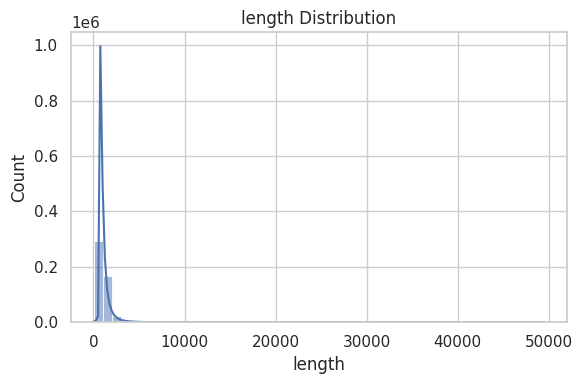

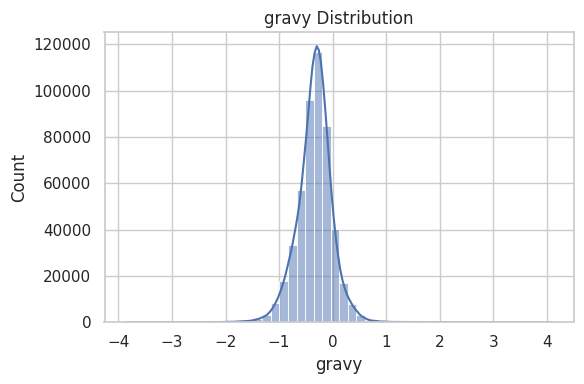

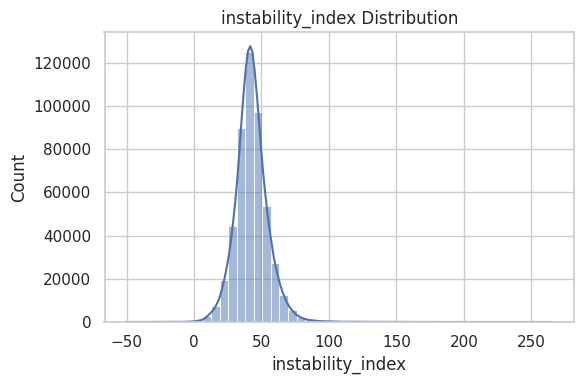

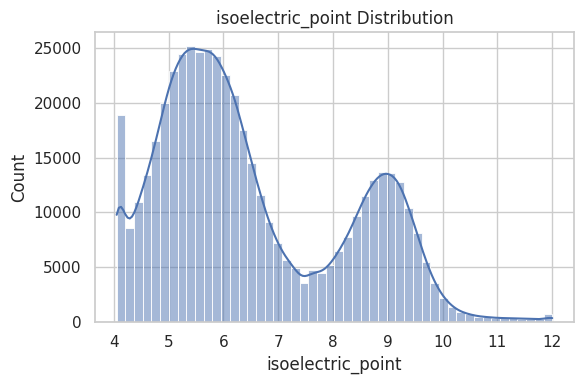

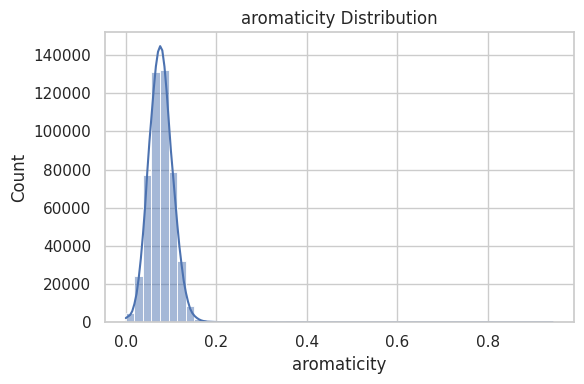

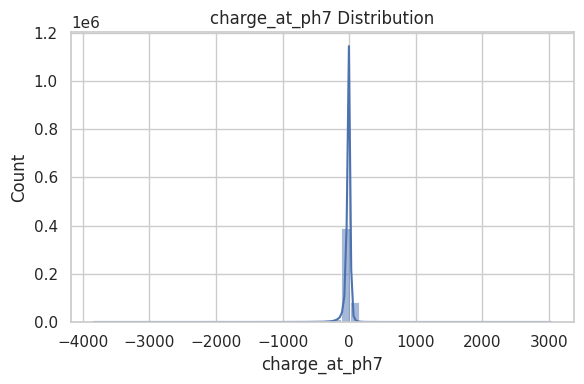

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fc2d739ee60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

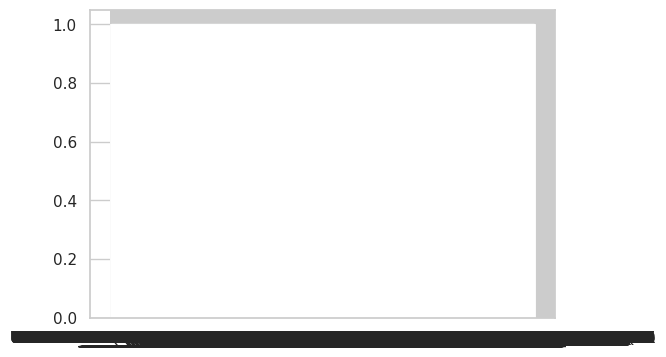

In [5]:
sns.set(style="whitegrid")
for key in global_keys:
    plt.figure(figsize=(6, 4))
    sns.histplot(biochemical_sample[key], kde=True, bins=50)
    plt.title(f"{key} Distribution")
    plt.xlabel(key)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [5]:
# load previous samples and stats
biochemical_sample = pd.read_csv("biochemical_benchmarks/uniprot50_biochemical_summary.csv")
global_keys = list(biochemical_sample.columns)
biochemical_stats = pd.read_csv("biochemical_benchmarks/uniprot50_biochemical_stats.csv")
print(global_keys)
biochemical_stats

['length', 'gravy', 'instability_index', 'isoelectric_point', 'aromaticity', 'charge_at_ph7', 'sequence_id']


Unnamed: 0        length         gravy  instability_index  \
0      count  6.864257e+06  6.864257e+06       6.864257e+06   
1       mean  2.848442e+02 -2.265938e-01       4.251655e+01   
2        std  3.387145e+02  4.643056e-01       1.500451e+01   
3        min  1.100000e+01 -4.320000e+00      -7.686772e+01   
4        25%  1.080000e+02 -4.845361e-01       3.312532e+01   
5        50%  1.930000e+02 -2.492188e-01       4.118776e+01   
6        75%  3.480000e+02 -9.604520e-03       5.029230e+01   
7        max  4.949900e+04  4.371795e+00       5.591109e+02   

   isoelectric_point   aromaticity  charge_at_ph7  
0       6.864257e+06  6.864257e+06   6.864257e+06  
1       7.307115e+00  8.211672e-02  -1.851706e+00  
2       2.154167e+00  3.686661e-02   1.966890e+01  
3       4.050028e+00  0.000000e+00  -3.298783e+03  
4       5.337261e+00  5.714286e-02  -6.097850e+00  
5       6.819394e+00  7.936508e-02  -2.833196e-01  
6       9.262318e+00  1.035197e-01   4.809689e+00  
7       1.199997e+01  9.767442e-01   2.464782e+03

In [27]:
sample_seq = "MNYRCVKNGRKCEMIESHERKKTMVIVNYYTLQAALHMLIKATHISRVRIDKGGEAMGMQACYPNNTNTQGGPELMLSCKVAFNTAIMPQDKGPRYLLGWWPADKGDTSANRRRWGQDA"
# sample_seq = "DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD"
# sample_seq = """
# M
# E
# N
# V
# N
# N
# N
# L
# N
# E
# K
# P
# N
# N
# G
# I
# V
# G
# Y
# A
# G
# N
# I
# Y
# G
# K
# Y
# D
# I
# T
# D
# L
# L
# Y
# N
# D
# Y
# L
# A
# V
# K
# Y
# D
# E
# T
# V
# N
# F
# N
# R
# V
# Y
# Y
# P
# F
# G
# N
# L
# S
# N
# """
# sample_seq = sample_seq.replace("\n", "")
sample_name = "Steered Zinc Finger"
new_sample = get_basic_props(sample_seq)
print(new_sample)

{'length': 119, 'gravy': -0.6252100840336137, 'instability_index': 40.847899159663854, 'isoelectric_point': 9.573248863220215, 'aromaticity': 0.07563025210084034, 'charge_at_ph7': 7.727853393388321}


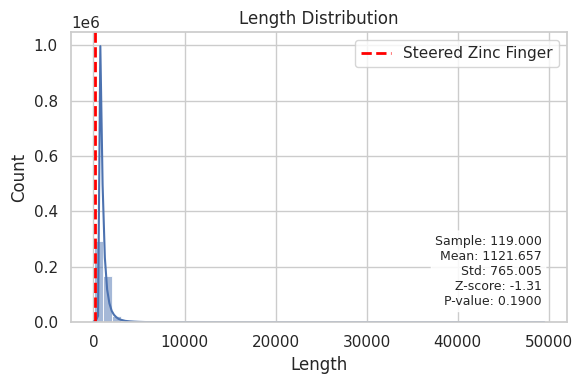

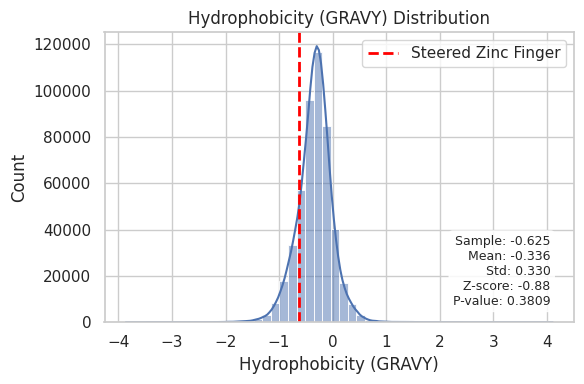

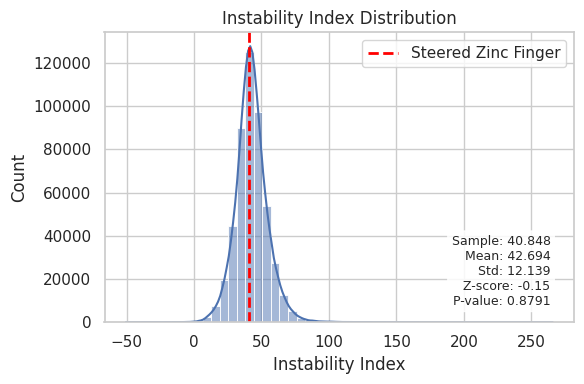

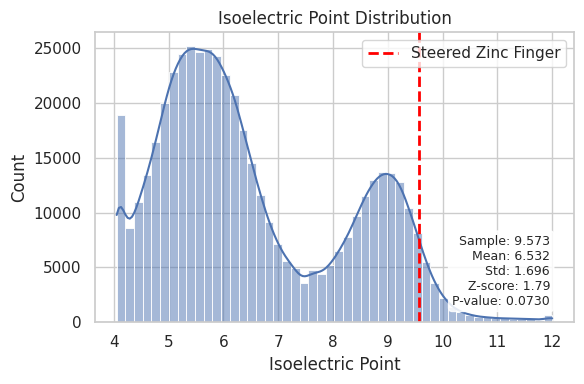

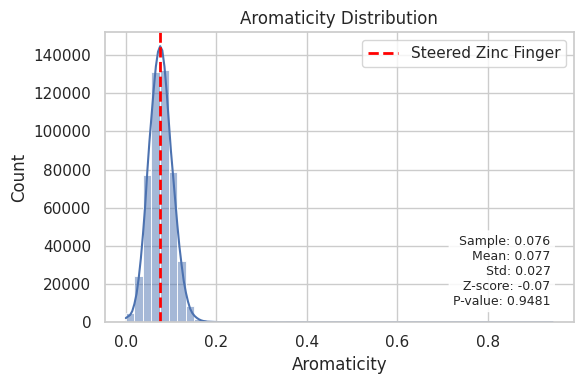

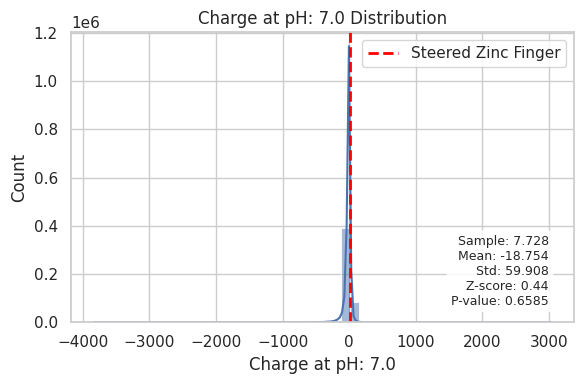

In [28]:
biokeys = [
    ('length', "Length"), 
    ('gravy', "Hydrophobicity (GRAVY)"),
    ('instability_index', "Instability Index"), 
    ('isoelectric_point', "Isoelectric Point"), 
    ('aromaticity', "Aromaticity"), 
    ('charge_at_ph7', "Charge at pH: 7.0")
    ]

sns.set(style="whitegrid")
for key in biokeys:
    values = biochemical_sample[key[0]].dropna()  # Ensure no NaNs
    new_val = new_sample[key[0]]

    # Compute stats
    mean_val = np.mean(values)
    std_val = np.std(values)
    z_score = (new_val - mean_val) / std_val
    p_value = stats.norm.sf(np.abs(z_score)) * 2  # two-sided p-value

    # Plot
    plt.figure(figsize=(6, 4))
    sns.histplot(values, kde=True, bins=50)
    plt.axvline(new_val, color='red', linestyle='--', linewidth=2, label=sample_name)
    plt.title(f"{key[1]} Distribution")
    plt.xlabel(key[1])
    plt.ylabel("Count")
    plt.legend()

    # Annotation text box
    textstr = (
        f"Sample: {new_val:.3f}\n"
        f"Mean: {mean_val:.3f}\n"
        f"Std: {std_val:.3f}\n"
        f"Z-score: {z_score:.2f}\n"
        f"P-value: {p_value:.4f}"
    )

    plt.gca().text(
        0.95, 0.05, textstr,
        transform=plt.gca().transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85)
    )

    plt.tight_layout()
    plt.savefig(f"biochemical_benchmarks/new_{key[0]}_uniprot50_plot.jpg")
    plt.show()

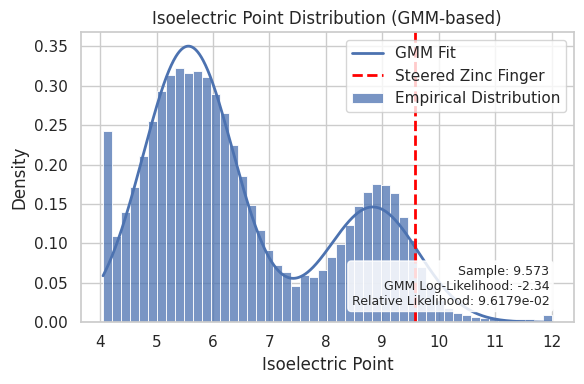

In [42]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select and reshape the data
pI_values = biochemical_sample["isoelectric_point"].dropna().values.reshape(-1, 1)
pI_sample = np.array([[new_sample["isoelectric_point"]]])

# Fit GMM with 2 components (bimodal assumption)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(pI_values)

# Score the new sample: log-likelihood under the mixture model
log_likelihood = gmm.score_samples(pI_sample)[0]
sample_prob = np.exp(log_likelihood)  # Convert log-likelihood to probability-like value

# Plotting the distribution with GMM components
x = np.linspace(pI_values.min(), pI_values.max(), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)

plt.figure(figsize=(6, 4))
sns.histplot(pI_values.flatten(), kde=False, bins=50, stat='density', label="Empirical Distribution")
plt.plot(x, pdf, label="GMM Fit", linewidth=2)
plt.axvline(pI_sample, color='red', linestyle='--', linewidth=2, label=sample_name)

plt.title("Isoelectric Point Distribution (GMM-based)")
plt.xlabel("Isoelectric Point")
plt.ylabel("Density")
plt.legend()

textstr = (
    f"Sample: {pI_sample.item():.3f}\n"
    f"GMM Log-Likelihood: {log_likelihood:.2f}\n"
    f"Relative Likelihood: {sample_prob:.4e}"
)

plt.gca().text(
    0.95, 0.05, textstr,
    transform=plt.gca().transAxes,
    fontsize=9, verticalalignment='bottom', horizontalalignment='right',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.85)
)

plt.tight_layout()
plt.savefig("biochemical_benchmarks/new_isoelectric_point_uniprot50_GMM_plot.jpg")
plt.show()


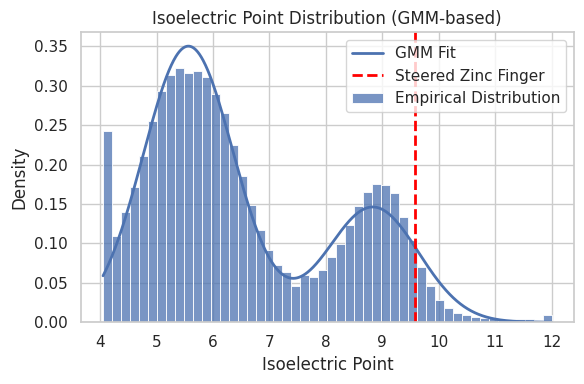

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
import numpy as np

# Get the first color of the default cycle (Seaborn’s “deep” palette)
default_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

# Prepare data
pI_values = biochemical_sample["isoelectric_point"].dropna().values.reshape(-1, 1)
pI_sample = np.array([[new_sample["isoelectric_point"]]])

# Fit GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(pI_values)

# Compute density
x   = np.linspace(pI_values.min(), pI_values.max(), 1000).reshape(-1, 1)
pdf = np.exp(gmm.score_samples(x))

# Plot
plt.figure(figsize=(6, 4))
sns.histplot(
    pI_values.flatten(),
    kde=False,
    bins=50,
    stat='density',
    color=default_blue,
    label="Empirical Distribution"
)
plt.plot(
    x, pdf.flatten(),
    color=default_blue,
    linewidth=2,
    label="GMM Fit"
)
plt.axvline(
    pI_sample,
    color='red',
    linestyle='--',
    linewidth=2,
    label=sample_name
)

plt.title("Isoelectric Point Distribution (GMM-based)")
plt.xlabel("Isoelectric Point")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from Bio.PDB import PDBParser, DSSP

# Path to repaired PDB from FoldX
pdb_path = "foldx/pdbs/dummy_sheet.pdb"

# Step 1: Parse the structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_path)
model = structure[0]  # Usually model 0

# Step 2: Run DSSP (must have mkdssp installed and in PATH)
dssp = DSSP(model, pdb_path)  # You can also specify dssp="path/to/mkdssp"

# Step 3: Create a Pos -> SS dictionary
ss_map = {}
for key in dssp.keys():
    res_id = key[1][1]  # residue number
    ss_type = dssp[key][2]  # H=helix, E=sheet, etc.
    if ss_type in ("H", "G", "I"):  # helix types
        ss_map[res_id] = "H"
    elif ss_type in ("E", "B"):  # strand types
        ss_map[res_id] = "E"
    else:
        ss_map[res_id] = "L"  # loop/other

# Example output
print("Secondary structure map (position -> type):")
print(ss_map)


/home/ubuntu/miniconda3/envs/protein_env/lib/python3.10/site-packages/Bio/PDB/DSSP.py:199: UserWarning: Line number 2 is empty!
Dropped unsupported records: PARENT
Error parsing PDB at line 3
Error trying to load file "foldx/pdbs/dummy_sheet.pdb"
Expected record CRYST1 but found ATOM  

  warnings.warn(err)


Exception: DSSP failed to produce an output

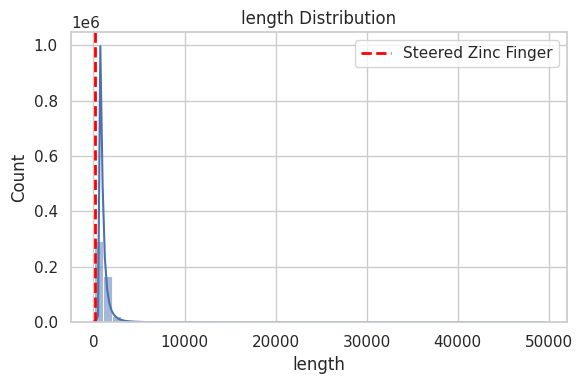

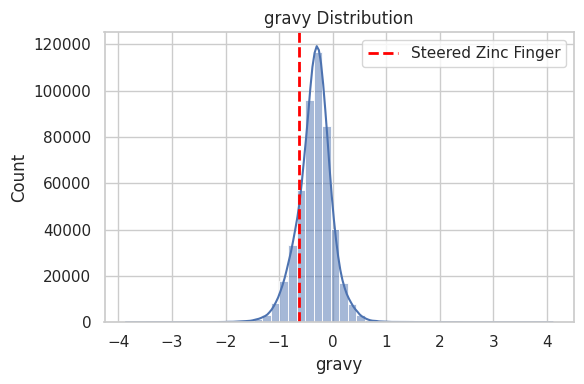

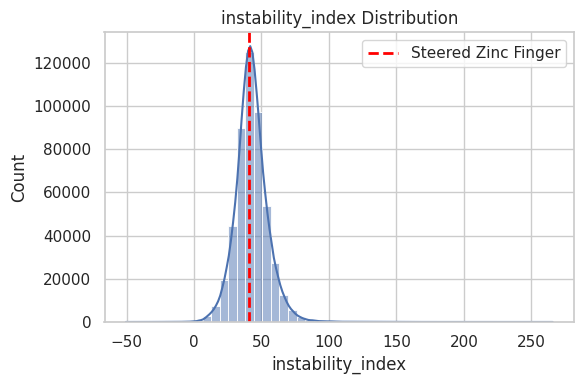

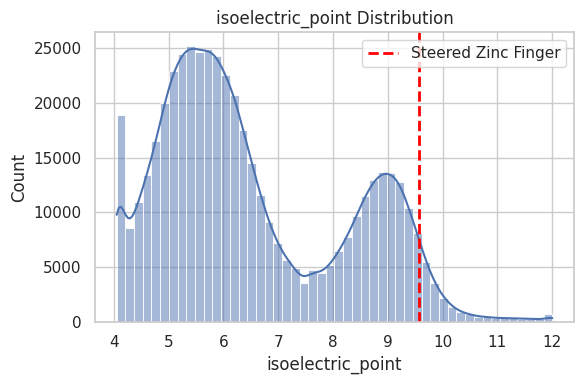

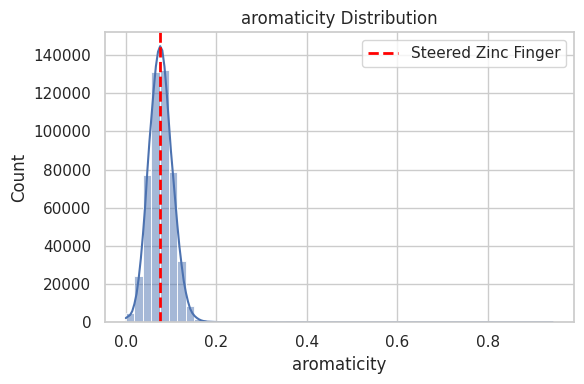

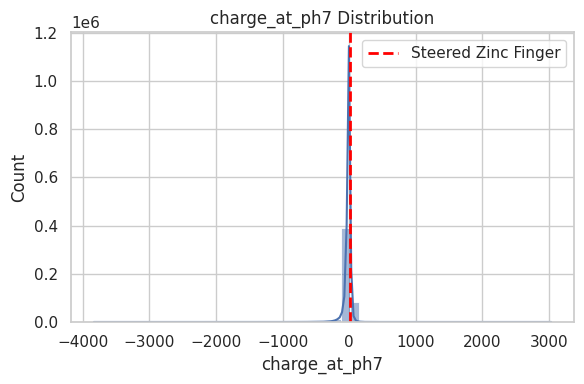

In [4]:
# Original keys and new sample
global_keys = ['length', 'gravy', 'instability_index', 'isoelectric_point', 'aromaticity', 'charge_at_ph7']

sns.set(style="whitegrid")
for key in global_keys:
    plt.figure(figsize=(6, 4))
    sns.histplot(biochemical_sample[key], kde=True, bins=50)
    plt.axvline(new_sample[key], color='red', linestyle='--', linewidth=2, label=sample_name)
    plt.title(f"{key} Distribution")
    plt.xlabel(key)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [7]:
# Perplexity Stats
df = pd.read_csv("biochemical_benchmarks/perplexity_sample_1.csv", names=["Id", "Perplexity", "Sequence"])
df_stats = pd.read_csv("biochemical_benchmarks/perplexity_sample_1_simple_stats.csv")
df.columns

Index(['Id', 'Perplexity', 'Sequence'], dtype='object')

In [8]:
perplexities = df["Perplexity"].to_list()
perplexities

[14.005868684312398,
 8.43289377169214,
 12.60533095247349,
 15.91475510021316,
 14.549625975169718,
 19.154367836387944,
 16.364390328552997,
 8.97822019301981,
 5.494625239546624,
 18.303697242505635,
 8.12910755650992,
 12.123106379965114,
 11.503679388614051,
 14.615912018891851,
 9.284849726015237,
 10.780146934894129,
 14.297056914807298,
 13.807976811044815,
 8.203163680844014,
 14.238562129044947,
 15.705137855277428,
 9.29274646536969,
 6.386132877614155,
 15.072962385554945,
 8.093947691645722,
 10.64866766556894,
 8.812925053956219,
 10.191979073590124,
 13.325120277252228,
 12.800388600888336,
 3.3835265435010413,
 12.235713714793745,
 4.861930712728551,
 10.994618365606724,
 4.386712585558219,
 13.523600610338466,
 12.986269502887772,
 15.805838945654076,
 10.065666376100753,
 6.728559179657189,
 10.321109360446956,
 16.61482717554839,
 14.555826371479938,
 4.319609656365025,
 9.089674330192512,
 11.074006401074422,
 12.3497025710166,
 9.53171200626895,
 9.74135213092326,


In [12]:
# Convert to numpy array
perplexities_np = np.array(perplexities)
new_sample_score = compute_estimated_masked_perplexity(sample_seq)

# Compute stats
mean_ppl = np.mean(perplexities_np)
std_ppl = np.std(perplexities_np)
z_score = (new_sample_score - mean_ppl) / std_ppl
p_value = stats.norm.sf(z_score)  # one-sided: P(X > new_sample)

print(f"Mean: {mean_ppl:.2f}, Std: {std_ppl:.2f}")
print(f"New sample perplexity: {new_sample_score:.2f}")
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

Mean: 13.72, Std: 3.43
New sample perplexity: 20.33
Z-score: 1.93
P-value: 0.0269


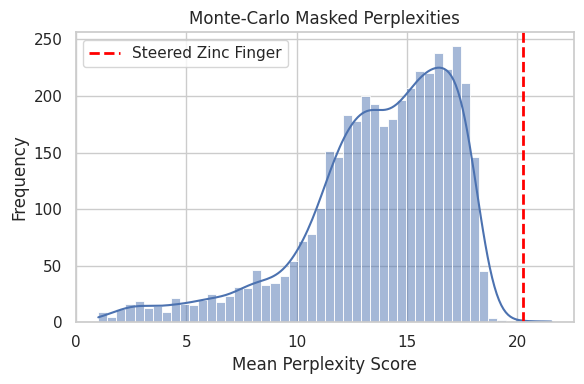

<Figure size 640x480 with 0 Axes>

In [ ]:
sample_seq = "MNYRCVKNGRKCEMIESHERKKTMVIVNYYTLQAALHMLIKATHISRVRIDKGGEAMGMQACYPNNTNTQGGPELMLSCKVAFNTAIMPQDKGPRYLLGWWPADKGDTSANRRRWGQDA"
new_sample_score = compute_estimated_masked_perplexity(sample_seq, lambda_t=10, num_samples=100)

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(perplexities, bins=50, kde=True)
plt.axvline(new_sample_score, color='red', linestyle='--', linewidth=2, label='Steered Zinc Finger')
plt.title("Monte-Carlo Masked Perplexities")
plt.xlabel("Mean Perplexity Score")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("new_zinc_finger_stats_relative.jpg")


### Stability and FoldX

In [10]:
from get_stability_benchmarks import *

Some weights of EsmForProteinFolding were not initialized from the model checkpoint at facebook/esmfold_v1 and are newly initialized: ['esm.contact_head.regression.bias', 'esm.contact_head.regression.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
result = run_foldx_stability("/home/ubuntu/protolyze/benchmarks/foldx/pdbs/steered_esmfold_structure.pdb")

   ********************************************
   ***                                      ***
   ***             FoldX 4.1 (c)            ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

Start RepairPDB >>>

1 models read: steered_esmfold_structure.pdb
Repair will take all residues into account
wild type

BackHbond       =               -28.57
SideHbond       =               -1.49
Energy_VdW      =               -20.34
Electro         =               0.29
Energy

In [46]:
visualize_pdb("/home/ubuntu/protolyze/benchmarks/foldx/pdbs/steered_esmfold_structure.pdb")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [44]:
#sample_seq = "MNYRCVKNGRKCEMIESHERKKTMVIVNYYTLQAALHMLIKATHISRVRIDKGGEAMGMQACYPNNTNTQGGPELMLSCKVAFNTAIMPQDKGPRYLLGWWPADKGDTSANRRRWGQDA"
sample_seq = "MNYRCVKNGRKCEMIESHERKKTMVIVNYYTLQAALHMLIKATHISRVRIDKGGEAMGMQACYPNNTNTQGGPELMLSCKVAFNTAIMPQDKGPRYLLGWWPADKGDTSANRRRWGQDA"

# sample_seq = """
# M
# D
# G
# A
# R
# T
# G
# I
# T
# W
# N
# K
# L
# W
# P
# R
# A
# G
# G
# A
# G
# P
# G
# W
# R
# L
# L
# P
# P
# G
# W
# F
# F
# W
# P
# L
# W
# N
# N
# T
# E
# R
# V
# L
# A
# L
# G
# G
# L
# I
# K
# G
# E
# I
# S
# F
# T
# A
# F
# A
# L
# F
# R
# R
# L
# G
# M
# Y
# K
# Q
# V
# T
# G
# S
# L
# """
PDB_HOME_DIR =  "/home/ubuntu/protolyze/benchmarks/foldx/pdbs/"
pdb_name = "dummy_example_03.pdb"
output_pdb_path = PDB_HOME_DIR + "/" + pdb_name

seq_to_pdb(sample_seq.replace("\n", ""), output_pdb_path)
result = run_foldx_stability(output_pdb_path) # repairs, then runs report

print(result)
visualize_pdb(output_pdb_path)

   ********************************************
   ***                                      ***
   ***             FoldX 4.1 (c)            ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

Start RepairPDB >>>

1 models read: dummy_example_03.pdb
Repair will take all residues into account
wild type

BackHbond       =               -28.27
SideHbond       =               -3.83
Energy_VdW      =               -61.14
Electro         =               -1.03
Energy_SolvP  

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [2]:
sequence = "MMNNNNNNYNSYNNNTNNNNNNNSNNNNNNNNNQNNNNYYYNNNNTNYMKNNNMTNNNNSYNNNNNNNMYPYNNNNCMNCNNNNNNYNNNNMNNYNMMMNYNNYNNNYSNYNNYNNNNNNNSNNNNNKNNYXNMNNMYNNNNNSMNSSNNSNNNTNNNNHNNNQSYMNNNNMNNCNNNNSYNYNYNYNNNMNNNXNNNNNMNNNNNNYNYXNNANNNNNNNNNPYNSMNNNNSNEYNYNNNNNNNGKNMNMNNNNNNENNNNNNMNNKNNGQYNNSSMNNMNNNNNYYNNYNNNYNTMNNNNYNSNNYNNNNNNNNNNNNSKNNNNMNNNNNNMNNNNNNYNTNNNNYXGNNNNNNNYMNMNMNNNNYNNNSNNNNNNYNSNNSNNNNNNNNNYNDTNNNNKQNNNNMNNYNNXNNNNNNNNNNMNYGNNNMISNNMNSNNMNNYNMKNNNMYNYNQNNNTNYMNNQQMYNNNNNENNMYNKMNNNNYSGNNNXNNNNYYENKNNNNSNNNNNMNQNNNENTNYYMTTNYNYNNNNYPSSNNSNNYMENYNNMQNANNNNNNYNNNNQNSGNMMSNNXNYNNSMNENFNNNNSNNYNINNNNNYNNNNNQNNYTNYNNNNNMNNNNMNNNMNNNSNNMNYNNNNENNNNNNMNNNXNYNNNXNNNYMNTNNYNYYNNYNYNNNNXNNNNNNNYSNNNNNNYMNNNNYNNNNNNMNMYNNYNNNSNKNNYNNMNMNMMNNNNNNNNNNNNNYNXNMNNNSNNNNNTNYNNNETNNNNNYMENNTNSYNSQNMNNNYNNNSY"
PDB_HOME_DIR =  "/home/ubuntu/protolyze/benchmarks/foldx/pdbs/"
pdb_name = "dummy_sheet.pdb"
output_pdb_path = PDB_HOME_DIR + "/" + pdb_name

seq_to_pdb(sequence, output_pdb_path)
result = run_foldx_stability(output_pdb_path) # repairs, then runs report

print(result)
visualize_pdb(output_pdb_path)

   ********************************************
   ***                                      ***
   ***             FoldX 4.1 (c)            ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

Start RepairPDB >>>

1 models read: dummy_sheet.pdb
Repair will take all residues into account
wild type

BackHbond       =               -76.97
SideHbond       =               -43.73
Energy_VdW      =               -338.18
Electro         =               1.89
Energy_SolvP    = 

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
super_coil_sequence = "DDTSNTAANWPWKVIVTFFFTCRRDFGSNFYHWQRIIESTTAETDYDSLQGFKVCKVSTNCKCLCKFRLPGFTDSYDEKEVFYDVMQMKKYSVVMMSFMS"
pdb_name = "dummy_supercoil.pdb"
output_pdb_path = PDB_HOME_DIR + "/" + pdb_name

seq_to_pdb(super_coil_sequence, output_pdb_path)
result = run_foldx_stability(output_pdb_path) # repairs, then runs report

print(result)
visualize_pdb(output_pdb_path)

   ********************************************
   ***                                      ***
   ***             FoldX 4.1 (c)            ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

Start RepairPDB >>>

1 models read: dummy_supercoil.pdb
Repair will take all residues into account
wild type

BackHbond       =               -11.41
SideHbond       =               -1.26
Energy_VdW      =               -47.33
Electro         =               -0.23
Energy_SolvP   

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
def plot_energy_sliding_window(df, window=10):
    """Line plot of sliding window average of residue energy."""
    df_sorted = df.sort_values('Pos')
    energy_series = df_sorted['Total'].rolling(window=window, center=True).mean()
    plt.figure(figsize=(10, 4))
    plt.plot(df_sorted['Pos'], energy_series)
    plt.xlabel("Residue Position")
    plt.ylabel(f"Avg Energy (Window={window})")
    plt.title("Sliding Window Average of Residue Energies")
    plt.tight_layout()
    plt.show()

In [5]:
plot_energy_sliding_window(result)

AttributeError: 'dict' object has no attribute 'sort_values'

In [6]:
seq1 = "XNNNNTNLNYNNNSKNFNNYNNNNNNNNNYNNQNNNNNANNMXNNKMNNNXNNNNNNNNNSNNNNNNNNSNNSYNSNNNMQNNYNYNNMNNNMNNNNYTNNNNNNNNNKNNMNNNYYNNKNNNNNNNLNMQNNNNNNNNNNNMNSNNNMMNXNNNNNNNYNNNNYNPNNMNNNMNNNYNXECNNYNNNNNNMYMNNNNTNNNNENNKDNNNYNNNNNYNCNN"
pdb_name = "dummy_supercoil_1.pdb"
output_pdb_path = PDB_HOME_DIR + "/" + pdb_name

seq_to_pdb(seq1, output_pdb_path)
result = run_foldx_stability(output_pdb_path) # repairs, then runs report

print(result)
visualize_pdb(output_pdb_path)

   ********************************************
   ***                                      ***
   ***             FoldX 4.1 (c)            ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

Start RepairPDB >>>

1 models read: dummy_supercoil_1.pdb
Repair will take all residues into account
wild type

BackHbond       =               -37.66
SideHbond       =               -9.94
Energy_VdW      =               -116.21
Electro         =               -0.91
Energy_SolvP

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
visualize_pdb("foldx/pdbs/dummy_supercoil_1_Repair.pdb")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
from Bio.PDB import PDBParser, DSSP
parser = PDBParser()
structure = parser.get_structure("sheet_test", output_pdb_path)
model = structure[0]
dssp = DSSP(model, output_pdb_path)

/home/ubuntu/miniconda3/envs/protein_env/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1793
  warnings.warn(
/home/ubuntu/miniconda3/envs/protein_env/lib/python3.10/site-packages/Bio/PDB/DSSP.py:199: UserWarning: Line number 2 is empty!
Dropped unsupported records: PARENT
Error parsing PDB at line 3
Error trying to load file "/home/ubuntu/protolyze/benchmarks/foldx/pdbs//dummy_supercoil_1.pdb"
Expected record CRYST1 but found ATOM  

  warnings.warn(err)


Exception: DSSP failed to produce an output

In [11]:
from Bio.PDB import PDBParser, DSSP

# Path to repaired PDB from FoldX
pdb_path = "foldx/pdbs/dummy_sheet.pdb"

# Step 1: Parse the structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_path)
model = structure[0]  # Usually model 0

# Step 2: Run DSSP (must have mkdssp installed and in PATH)
dssp = DSSP(model, pdb_path)  # You can also specify dssp="path/to/mkdssp"

# Step 3: Create a Pos -> SS dictionary
ss_map = {}
for key in dssp.keys():
    res_id = key[1][1]  # residue number
    ss_type = dssp[key][2]  # H=helix, E=sheet, etc.
    if ss_type in ("H", "G", "I"):  # helix types
        ss_map[res_id] = "H"
    elif ss_type in ("E", "B"):  # strand types
        ss_map[res_id] = "E"
    else:
        ss_map[res_id] = "L"  # loop/other

# Example output
print("Secondary structure map (position -> type):")
print(ss_map)


/home/ubuntu/miniconda3/envs/protein_env/lib/python3.10/site-packages/Bio/PDB/DSSP.py:199: UserWarning: Line number 2 is empty!
Dropped unsupported records: PARENT
Error parsing PDB at line 3
Error trying to load file "foldx/pdbs/dummy_sheet.pdb"
Expected record CRYST1 but found ATOM  

  warnings.warn(err)


Exception: DSSP failed to produce an output

In [12]:
def fix_foldx_pdb_for_dssp(input_path: str, output_path: str):
    with open(input_path, "r") as infile:
        lines = infile.readlines()

    with open(output_path, "w") as outfile:
        # Write a fake header
        outfile.write("HEADER    FOLDX_REPAIRED_STRUCTURE\n")
        outfile.write("CRYST1   60.000   60.000   60.000  90.00  90.00  90.00 P 1           1\n")

        for line in lines:
            if line.startswith("ATOM") or line.startswith("HETATM") or line.startswith("TER") or line.startswith("END"):
                outfile.write(line)


In [13]:
# Fix the FoldX PDB
input_pdb = "foldx/pdbs/dummy_sheet_Repair.pdb"
fixed_pdb = "foldx/pdbs/dummy_sheet_fixed.pdb"
fix_foldx_pdb_for_dssp(input_pdb, fixed_pdb)

# Use with Biopython and DSSP
from Bio.PDB import PDBParser, DSSP

parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", fixed_pdb)
model = structure[0]
dssp = DSSP(model, fixed_pdb)

# Extract SS map (position -> H, E, L)
ss_map = {}
for key in dssp.keys():
    res_id = key[1][1]
    ss = dssp[key][2]
    if ss in ("H", "G", "I"):
        ss_map[res_id] = "H"
    elif ss in ("E", "B"):
        ss_map[res_id] = "E"
    else:
        ss_map[res_id] = "L"

print(ss_map)


/home/ubuntu/miniconda3/envs/protein_env/lib/python3.10/site-packages/Bio/PDB/DSSP.py:199: UserWarning: Resulting mmCIF file is not valid!
Invalid mmCIF file use --verbose option to see errors
Not a known element: 

  warnings.warn(err)


Exception: DSSP failed to produce an output